In [ ]:
pip install pycausalimpact==0.0.16

In [3]:
import numpy as np
import pandas as pd 
from statsmodels.tsa.arima_process import ArmaProcess
import causalimpact 
from causalimpact import CausalImpact

# Generate random sample

np.random.seed(0)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

X = 50 + arma_process.generate_sample(nsample=1000)
y = 1.6 * X + np.random.normal(size=1000)

# There is a change starting from index 800
y[800:] += 10

In [4]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 799]
post_period = [800, 999]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    90.03              18006.16
Prediction (s.d.)         79.97 (0.3)        15994.43 (60.49)
95% CI                    [79.39, 80.58]     [15878.12, 16115.23]

Absolute effect (s.d.)    10.06 (0.3)        2011.72 (60.49)
95% CI                    [9.45, 10.64]      [1890.93, 2128.03]

Relative effect (s.d.)    12.58% (0.38%)     12.58% (0.38%)
95% CI                    [11.82%, 13.3%]    [11.82%, 13.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 90.03. By contrast, in the absence of an
intervention, we would have expected an average response of 79.97.
The 95% interval of this counterfactual prediction is [79.39, 80.58].
Subtracting this predictio

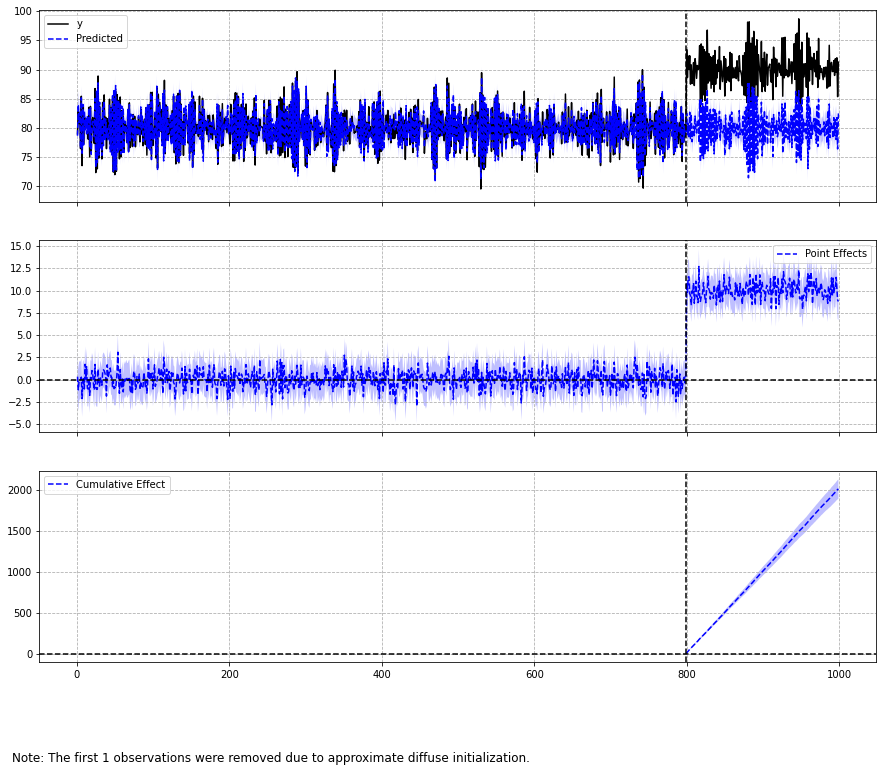

In [5]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()